<figure>
  <IMG src="figures/logo-esi-sba.png" WIDTH=300 height="100" ALIGN="right">
</figure>

# Practical Trainining Series on Software Engineering For Data Science  
*By Dr. Belkacem KHALDI (b.khaldi@esi-sba.dz)*

# Notebook 6: Data Processing & Cleaning for Data Science: Data Wrangling Documents and Web Scraping

The purpose of this [Jupyter Notebook] is to getting you introduced to the Data Processing & Cleaning for Data
Science: Data Wrangling Documents and Web Scraping. It provides a set of practical Training challenges that allow grasping the different concepts presented in  lecture 6.

## Parsing and Processing Text Documents

### Challenge 1: 
Given the text shown in the code below, you are asked to do the basic parsing and processing text operations checklist seen in the lecture (Slides 4-9) to provide a basic text analysis report.

``` python
import string

text = """
Data science incorporates tools from multiple disciplines to gather a data set, process, and derive insights from the data set, extract meaningful data from the set, and interpret it for decision-making purposes. 
The disciplinary areas that make up the data science field include mining, statistics, machine learning, analytics, and programming.

Data mining applies algorithms to the complex data set to reveal patterns that are then used to extract useful and relevant data from the set. 
Statistical measures or predictive analytics use this extracted data to gauge events that are likely to happen in the future based on what the data shows happened in the past.

Machine learning is an artificial intelligence tool that processes mass quantities of data that a human would be unable to process in a lifetime. Machine learning perfects the decision model presented under predictive analytics by matching the likelihood of an event happening to what actually happened at a predicted time.
Using analytics, the data analyst collects and processes the structured data from the machine learning stage using algorithms. 
The analyst interprets, converts, and summarizes the data into a cohesive language that the decision-making team can understand.
Data science is applied to practically all contexts and, as the data scientist's role evolves, the field will expand to encompass data architecture, data engineering, and data administration.
"""
```

`Hint:`
These are some of the basic text analysis operations

* Reading & Extracting Texts
*  Basic Text Cleaning:
    * Removing unnecessary punctuation, tags
    * Tokenization
    * Removing stop words
* Basic words Analysis

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hibetelrahmane\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


=== Rapport d'analyse textuelle ===
Nombre total de mots : 137
Nombre de mots uniques : 93
10 mots les plus fréquents :
data - 19
set - 5
machine - 4
learning - 4
analytics - 4
science - 3
process - 2
extract - 2
decisionmaking - 2
field - 2


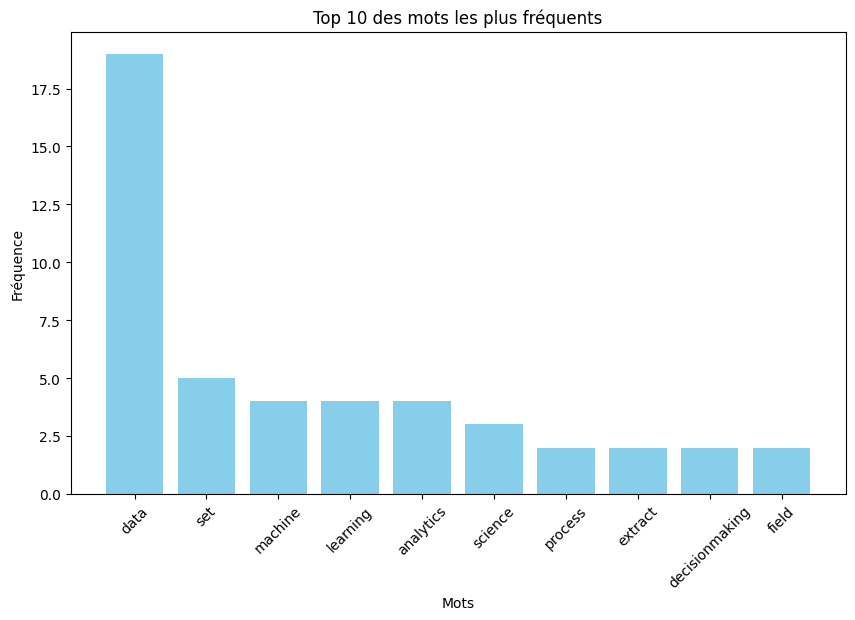

In [4]:
import string
from nltk.corpus import stopwords
from collections import Counter
import nltk
import matplotlib.pyplot as plt

# Télécharger les ressources nécessaires de NLTK
nltk.download('stopwords')

# Texte fourni
text = """
Data science incorporates tools from multiple disciplines to gather a data set, process, and derive insights from the data set, extract meaningful data from the set, and interpret it for decision-making purposes. 
The disciplinary areas that make up the data science field include mining, statistics, machine learning, analytics, and programming.

Data mining applies algorithms to the complex data set to reveal patterns that are then used to extract useful and relevant data from the set. 
Statistical measures or predictive analytics use this extracted data to gauge events that are likely to happen in the future based on what the data shows happened in the past.

Machine learning is an artificial intelligence tool that processes mass quantities of data that a human would be unable to process in a lifetime. Machine learning perfects the decision model presented under predictive analytics by matching the likelihood of an event happening to what actually happened at a predicted time.
Using analytics, the data analyst collects and processes the structured data from the machine learning stage using algorithms. 
The analyst interprets, converts, and summarizes the data into a cohesive language that the decision-making team can understand.
Data science is applied to practically all contexts and, as the data scientist's role evolves, the field will expand to encompass data architecture, data engineering, and data administration.
"""

# Étape 1 : Nettoyage du texte
# Convertir le texte en minuscules et supprimer la ponctuation
cleaned_text = text.lower()
cleaned_text = cleaned_text.translate(str.maketrans('', '', string.punctuation))

# Étape 2 : Tokenisation
# Diviser le texte en mots
tokens = cleaned_text.split()

# Étape 3 : Suppression des mots vides (stop words)
# Liste des mots vides en anglais
stop_words = set(stopwords.words('english'))

# Filtrer les mots pour exclure les stop words
filtered_tokens = [word for word in tokens if word not in stop_words]

# Étape 4 : Analyse de base des mots
# Calculer le nombre total de mots, de mots uniques et la fréquence des mots
total_words = len(filtered_tokens)
unique_words = len(set(filtered_tokens))
word_frequency = Counter(filtered_tokens)

# Afficher les résultats de l'analyse
print("=== Rapport d'analyse textuelle ===")
print(f"Nombre total de mots : {total_words}")
print(f"Nombre de mots uniques : {unique_words}")
print("10 mots les plus fréquents :")
for word, freq in word_frequency.most_common(10):
    print(f"{word} - {freq}")

# Étape 5 : Visualisation des mots les plus fréquents
# Extraire les mots et leurs fréquences
most_common_words = word_frequency.most_common(10)
words, counts = zip(*most_common_words)

# Création d'un graphique en barres
plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue')
plt.xlabel('Mots')
plt.ylabel('Fréquence')
plt.title('Top 10 des mots les plus fréquents')
plt.xticks(rotation=45)
plt.show()


### Challenge 2:
You've just started a new data science position at the Cybersecurity Unit of the U.S. DEPARTMENT OF COMMERCE. The department wants to build, test, and evaluate new machine learning model using thier 2020 annual report document availabe in the local data folder:`2020_Cybersecurity_and_Privacy_Annual_Re.docx`. 

You are asked to provide a visual report summarizing the most common frequency keywords used in their report. 



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hibetelrahmane\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


=== Rapport d'analyse textuelle ===
Nombre total de mots : 7998
Nombre de mots uniques : 2318
10 mots les plus fréquents :
nist - 184
cybersecurity - 137
privacy - 97
security - 97
standards - 68
development - 63
risk - 58
information - 56
systems - 53
management - 53


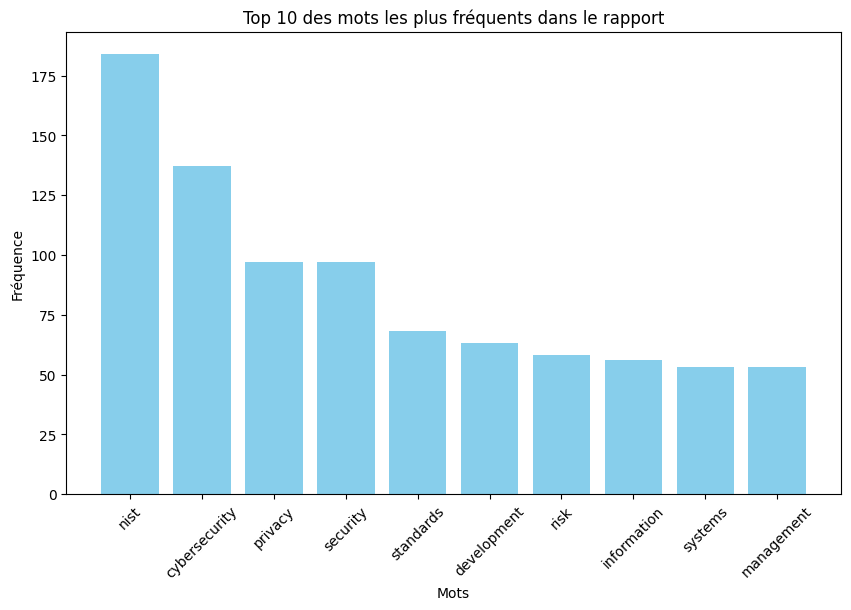

In [8]:
import string
from nltk.corpus import stopwords
from collections import Counter
import nltk
import matplotlib.pyplot as plt
from docx import Document

# Télécharger les ressources nécessaires de NLTK
nltk.download('stopwords')

# Étape 1 : Charger et lire le document .docx
doc_path = 'data/2020_Cybersecurity_and_Privacy_Annual_Re.docx'

doc = Document(doc_path)

# Extraire tout le texte du document
text = ""
for para in doc.paragraphs:
    text += para.text + " "

# Étape 2 : Nettoyage du texte
cleaned_text = text.lower()
cleaned_text = cleaned_text.translate(str.maketrans('', '', string.punctuation))

# Étape 3 : Tokenisation
tokens = cleaned_text.split()

# Étape 4 : Suppression des mots vides (stop words)
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word not in stop_words]

# Étape 5 : Analyse de fréquence des mots
word_frequency = Counter(filtered_tokens)

# Afficher les résultats
print("=== Rapport d'analyse textuelle ===")
total_words = len(filtered_tokens)
unique_words = len(set(filtered_tokens))
print(f"Nombre total de mots : {total_words}")
print(f"Nombre de mots uniques : {unique_words}")
print("10 mots les plus fréquents :")
for word, freq in word_frequency.most_common(10):
    print(f"{word} - {freq}")

# Étape 6 : Visualisation des mots les plus fréquents
most_common_words = word_frequency.most_common(10)
words, counts = zip(*most_common_words)

# Création du graphique
plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue')
plt.xlabel('Mots')
plt.ylabel('Fréquence')
plt.title('Top 10 des mots les plus fréquents dans le rapport')
plt.xticks(rotation=45)
plt.show()


## Web Scraping: Parsing and processing Web Pages
### Challenge 3:
We want to analyse text collected from https://en.wikipedia.org/wiki/Data_science  wikipedia page. We are only interested on the text content of links html anchor (`a`).  

1. Do the cheklist basic text analyses to provid a visyal summarry of all href text links available on the page.

`Hint:`
1. Follow and adjust the procedures in Lecture 6 - Slides: 14-16 - to collect the required text. In case, you have not figured out how to collect the required information, here is below a code that help you:


``` python
from urllib.request import urlopen
from bs4 import BeautifulSoup as bs
import lxml

url = 'https://en.wikipedia.org/wiki/Data_science'
page = urlopen(url).read().decode('utf-8')

soup = bs(page)

links = soup.find_all('a')
all_link_text = []

all_link_text.extend([a.text for a in links])

text = ' '.join(all_link_text)
text
``` 

2. Follow the checklist text analysis to clean and visualize the most common words used in the collected text.

### Challenge 4:
We want to analyse text related to data science topic collected from different web pages: https://www.heavy.ai/learn/data-science,  https://en.wikipedia.org/wiki/Data_science, https://www.ibm.com/cloud/learn/data-science-introduction, and https://deepai.org/machine-learning-glossary-and-terms/data-science alongside with the text string object of challenge 01.

Note that we are only interested on the text content of  html anchor (`p`) from the webpages.  

1. Do the required procedures to collect all  `p` text available on all of the aformentioned web pages.
2. Append the collected text with the text string object of challenge 01
3. Do the cheklist basic text analyses to provid a visyal summarry of the most frequently used keywords on the resulted text.



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hibetelrahmane\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


=== 10 mots les plus fréquents ===
data - 70
science - 36
doi - 16
edit - 14
big - 10
statistics - 9
analysis - 8
statistical - 8
issn - 8
machine - 7


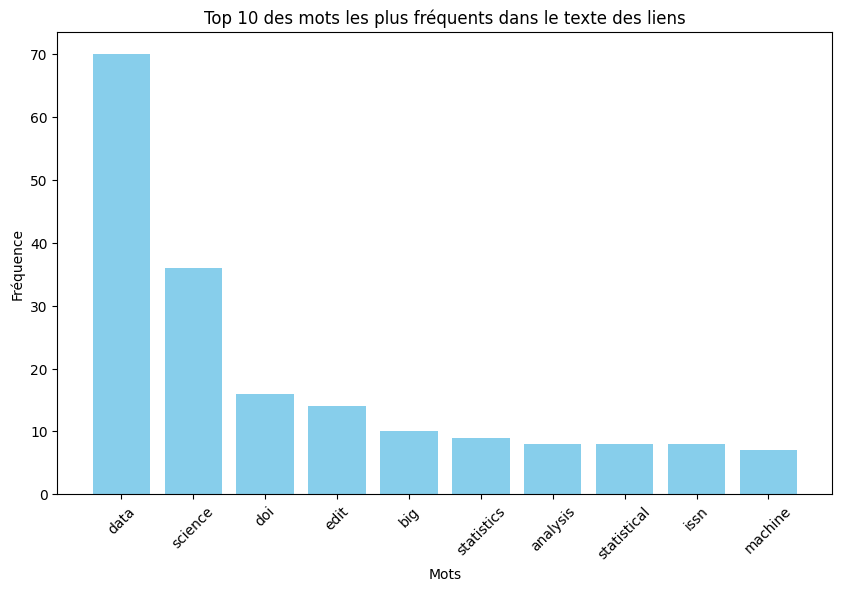

In [11]:
from urllib.request import urlopen
from bs4 import BeautifulSoup as bs
import string
from nltk.corpus import stopwords
from collections import Counter
import nltk
import matplotlib.pyplot as plt

# Télécharger les ressources nécessaires de NLTK
nltk.download('stopwords')

# Récupérer la page de Wikipédia sur la science des données
url = 'https://en.wikipedia.org/wiki/Data_science'
page = urlopen(url).read().decode('utf-8')

# Parser la page avec BeautifulSoup
soup = bs(page, 'lxml')

# Trouver toutes les balises <a> (liens)
links = soup.find_all('a')

# Extraire le texte de chaque lien
all_link_text = [a.text for a in links]

# Combiner tous les textes extraits des liens dans une seule chaîne
text = ' '.join(all_link_text)

# Nettoyer le texte : convertir en minuscules et supprimer la ponctuation
cleaned_text = text.lower()
cleaned_text = cleaned_text.translate(str.maketrans('', '', string.punctuation))

# Tokenisation : séparer le texte en mots
tokens = cleaned_text.split()

# Supprimer les mots vides (stopwords)
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word not in stop_words]

# Calculer la fréquence des mots
word_frequency = Counter(filtered_tokens)

# Afficher les 10 mots les plus fréquents
print("=== 10 mots les plus fréquents ===")
for word, freq in word_frequency.most_common(10):
    print(f"{word} - {freq}")

# Visualisation des résultats : graphique en barres des mots les plus fréquents
most_common_words = word_frequency.most_common(10)
words, counts = zip(*most_common_words)

plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue')
plt.xlabel('Mots')
plt.ylabel('Fréquence')
plt.title('Top 10 des mots les plus fréquents dans le texte des liens')
plt.xticks(rotation=45)
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hibetelrahmane\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


=== 10 mots les plus fréquents ===
data - 575
science - 206
learning - 53
machine - 51
business - 46
analysis - 45
scientists - 44
also - 36
insights - 35
statistical - 34


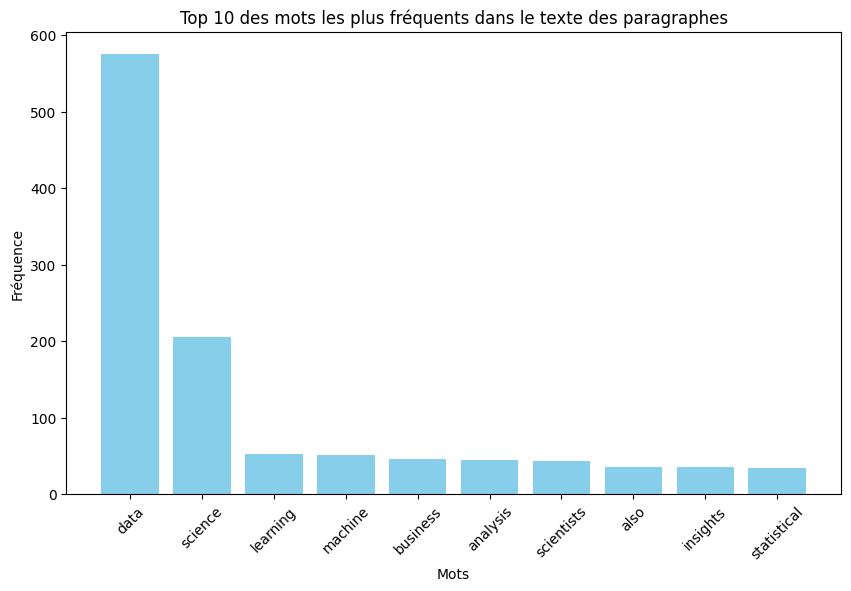

In [25]:
import unicodedata
import re
from urllib.request import urlopen
from bs4 import BeautifulSoup as bs
import string
from nltk.corpus import stopwords
from collections import Counter
import nltk
import matplotlib.pyplot as plt

# Télécharger les ressources nécessaires de NLTK
nltk.download('stopwords')

# Liste des URLs à traiter
urls = [
    "https://www.heavy.ai/learn/data-science",
    "https://en.wikipedia.org/wiki/Data_science",
    "https://www.ibm.com/cloud/learn/data-science-introduction",
    "https://deepai.org/machine-learning-glossary-and-terms/data-science"
]

# Texte additionnel "challenge 01"
challenge_01_text = """
Data science incorporates tools from multiple disciplines to gather a data set, process, and derive insights from the data set, extract meaningful data from the set, and interpret it for decision-making purposes. 
The disciplinary areas that make up the data science field include mining, statistics, machine learning, analytics, and programming.

Data mining applies algorithms to the complex data set to reveal patterns that are then used to extract useful and relevant data from the set. 
Statistical measures or predictive analytics use this extracted data to gauge events that are likely to happen in the future based on what the data shows happened in the past.

Machine learning is an artificial intelligence tool that processes mass quantities of data that a human would be unable to process in a lifetime. Machine learning perfects the decision model presented under predictive analytics by matching the likelihood of an event happening to what actually happened at a predicted time.
Using analytics, the data analyst collects and processes the structured data from the machine learning stage using algorithms. 
The analyst interprets, converts, and summarizes the data into a cohesive language that the decision-making team can understand.
Data science is applied to practically all contexts and, as the data scientist's role evolves, the field will expand to encompass data architecture, data engineering, and data administration.
"""

# Variable pour stocker tout le texte collecté
all_text = ""

for url in urls:
    try:
        # Récupérer le contenu de la page
        page = urlopen(url).read().decode('utf-8')
        
        # Parser la page avec BeautifulSoup
        soup = bs(page, 'lxml')
        
        # Trouver toutes les balises <p>
        paragraphs = soup.find_all('p')
        
        # Extraire le texte de chaque paragraphe
        page_text = ' '.join([p.get_text() for p in paragraphs])
        
        # Ajouter le texte de la page au texte total
        all_text += page_text + " "
        
    except Exception as e:
        print(f"Erreur lors de l'accès à {url} : {e}")

# Ajouter le texte de "challenge 01"
all_text += challenge_01_text

# Nettoyage avancé du texte
def clean_text(text):
    # Normaliser le texte pour supprimer les caractères invisibles
    text = unicodedata.normalize("NFKD", text)
    # Convertir en minuscules
    text = text.lower()
    # Supprimer les caractères non désirés comme ‍ explicitement
    text = re.sub(r'\u200d', '', text)  # Supprime le zero-width joiner
    # Supprimer tout ce qui n'est pas un mot ou un espace
    text = re.sub(r'[^a-z\s]', '', text)
    # Supprimer les espaces multiples
    text = ' '.join(text.split())
    return text

cleaned_text = clean_text(all_text)

# Tokenisation : séparer le texte en mots
tokens = cleaned_text.split()

# Supprimer les mots vides (stopwords)
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word not in stop_words]

# Calculer la fréquence des mots
word_frequency = Counter(filtered_tokens)

# Afficher les 10 mots les plus fréquents
print("=== 10 mots les plus fréquents ===")
for word, freq in word_frequency.most_common(10):
    print(f"{word} - {freq}")

# Visualisation des résultats : graphique en barres des mots les plus fréquents
most_common_words = word_frequency.most_common(10)
words, counts = zip(*most_common_words)

plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue')
plt.xlabel('Mots')
plt.ylabel('Fréquence')
plt.title('Top 10 des mots les plus fréquents dans le texte des paragraphes')
plt.xticks(rotation=45)
plt.show()


### Challenge 4:

You're in the initial stages of a new position as a Data Scientist at Goodreads (https://www.goodreads.com/) company. Your primary task is to build a robust understanding of customer sentiments and preferences related to quots, focusing on the `Motivational` tag.

The team you're collaborating with has a specific interest in quotes text, authors or Book titles, tags, and number of likes  from the `Motivational` tag on Goodreads as shown in the figure. They've tasked you with conducting web scraping and basic text analysis on quotes from this category. Your goal is to provide insights into the most frequently occurring keywords by author, or book title, or keyword tags.


<figure>
  <IMG src="figures/goodbooks.png"  ALIGN="right">
</figure>

#### II.  Requirements:

##### 1. Web Scraping and data collection:

1. Scraping the the required contents from the two following first 5 pages:
  *  https://www.goodreads.com/quotes/tag/motivational?page=1
  *  https://www.goodreads.com/quotes/tag/motivational?page=2
  *  https://www.goodreads.com/quotes/tag/motivational?page=3
  *  https://www.goodreads.com/quotes/tag/motivational?page=4
  *  https://www.goodreads.com/quotes/tag/motivational?page=5
  
2. Store the scraped data in a dataframe with the approporiat columns names 
##### 2. Text Analysis:

1. Performing basic text analysis and generate a visulaization report on:
  - The overall quot texts of the entire dataframe to identify the most common frequency keywords.
  - The quot texts by author or book title, or tag
2. Using the apropriate chart type, Visualize the number of likes  by author or booktitle or by tag.




### Hints:
1- Consider using the Browser Dev. Tools for further assistance and html componenets inspections to identify the appropriat related contents html css classes and tags.For example, each quote detail text is displayed in an html markup `div` with class name: `quoteText`.
You may get any `<html_markup_name>` contents for a specific class name by using the following code: 
``` python
soup.find_all("<html_markup_name>", {"class": "<class_name>"})
```






[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hibetelrahmane\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                               quote           author  \
0  “I must not fear. Fear is the mind-killer. Fea...   Frank Herbert,   
1  “Attitude is a choice. Happiness is a choice. ...  Roy T. Bennett,   
2  “Don't be pushed around by the fears in your m...  Roy T. Bennett,   
3  “Believe in yourself. You are braver than you ...  Roy T. Bennett,   
4  “Live the Life of Your Dreams: Be brave enough...  Roy T. Bennett,   

         likes                    book  
0  15991 likes                    Dune  
1   9818 likes  The Light in the Heart  
2   9512 likes  The Light in the Heart  
3   6848 likes  The Light in the Heart  
4   6626 likes  The Light in the Heart  
Le fichier Excel a été enregistré avec succès.
=== 10 mots les plus fréquents ===
heart - 72
light - 67
bennettthe - 66
life - 46
people - 29
make - 27
dont - 25
truth - 24
free - 23
let - 21


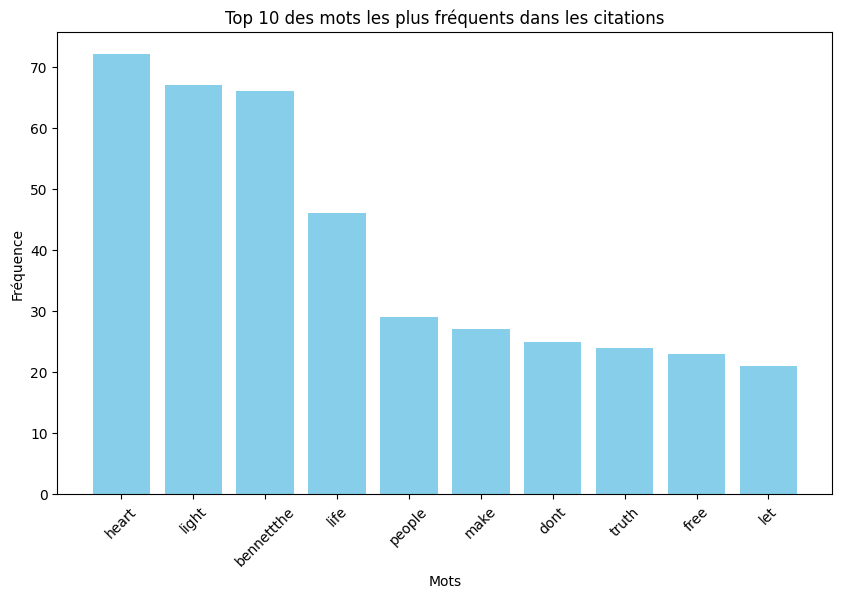

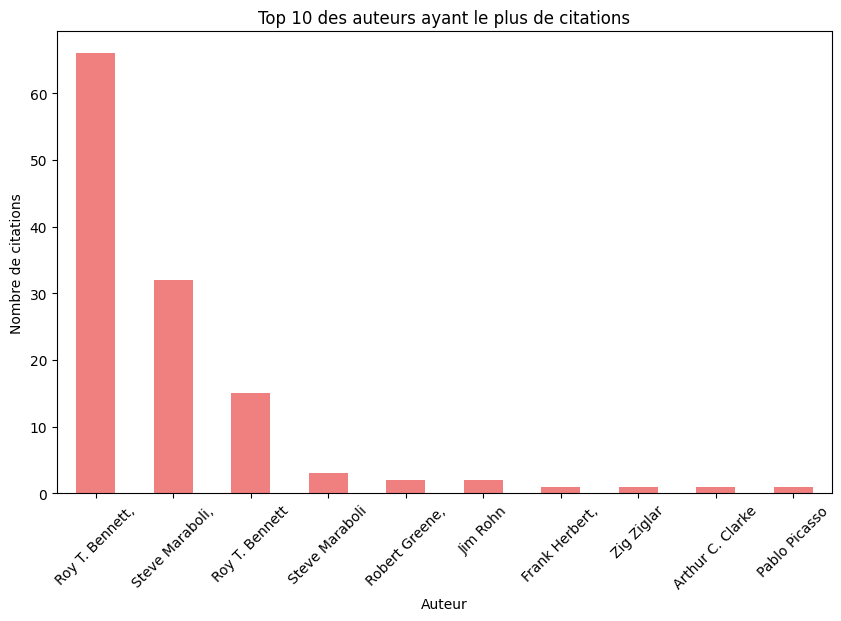

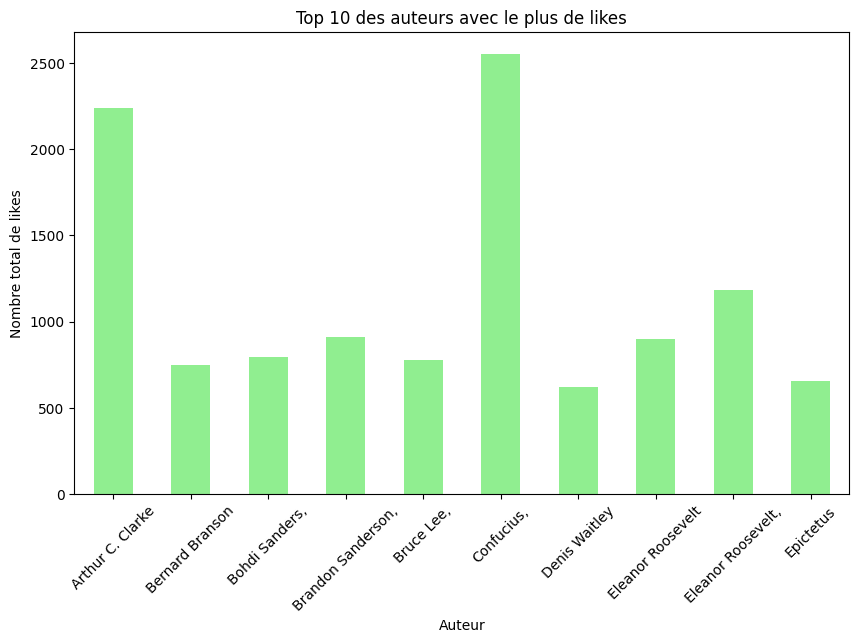

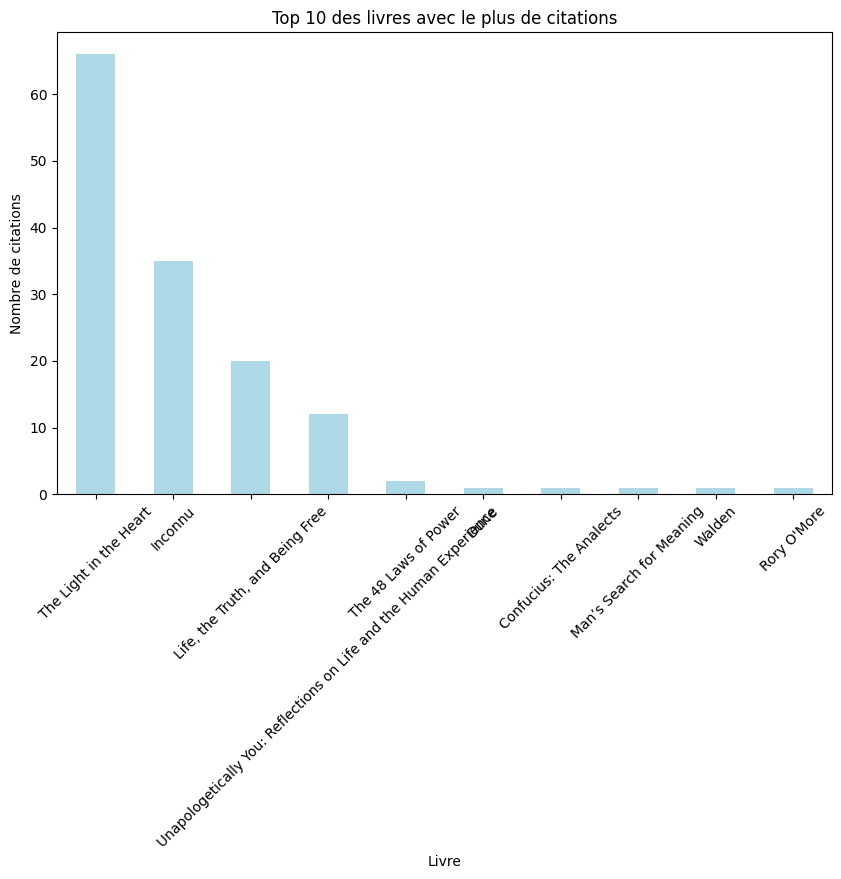

In [44]:
import time
import pandas as pd
from selenium import webdriver
from selenium.webdriver.edge.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
from collections import Counter
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

# Télécharger les ressources nécessaires de NLTK (si ce n'est pas déjà fait)
nltk.download('stopwords')

# Définir le chemin vers le Edge WebDriver
service = Service("C:/Users/Hibetelrahmane/Downloads/edgedriver_win64/msedgedriver.exe")  # Chemin vers msedgedriver.exe
driver = webdriver.Edge(service=service)

# Initialiser une liste pour stocker les citations
quotes_data = []

# Pour chaque page de citations (pages 1 à 5)
for page in range(1, 6):
    # Ouvrir la page de citations
    url = f"https://www.goodreads.com/quotes/tag/motivational?page={page}"
    driver.get(url)

    # Attendre que la page se charge (ajustez si nécessaire)
    time.sleep(2)

    # Extraire le contenu de la page
    soup = BeautifulSoup(driver.page_source, 'html.parser')

    # Trouver toutes les citations
    quotes = soup.find_all('div', class_='quote')

    # Pour chaque citation, extraire le texte, l'auteur, le titre du livre et les likes
    for quote in quotes:
        quote_text = quote.find('div', class_='quoteText').get_text(strip=True)
        author = quote.find('span', class_='authorOrTitle').get_text(strip=True) if quote.find('span', class_='authorOrTitle') else 'Inconnu'
        
        # Extraction du nombre de likes (en extrait le texte à partir de l'élément avec la classe 'smallText')
        likes = quote.find('a', class_='smallText')
        likes_count = likes.get_text(strip=True) if likes else '0'

        # Extraction du titre du livre (si disponible)
        book = quote.find('span', id=lambda x: x and x.startswith('quote_book_link'))
        book_title = book.get_text(strip=True) if book else 'Inconnu'
        
        quotes_data.append({"quote": quote_text, "author": author, "likes": likes_count, "book": book_title})

# Fermer le navigateur après avoir récupéré les données
driver.quit()

# Convertir les données extraites en DataFrame
df = pd.DataFrame(quotes_data)

# Afficher les 5 premières lignes pour vérifier
print(df.head())

# Enregistrer le DataFrame dans un fichier Excel
df.to_excel("quotes_motivational.xlsx", index=False)

print("Le fichier Excel a été enregistré avec succès.")

# Nettoyage du texte : enlever les stopwords et ponctuation
stop_words = set(stopwords.words('english'))
df['quote_cleaned'] = df['quote'].str.lower().str.replace(r'[^\w\s]', '', regex=True)

# Tokenisation des citations
df['tokens'] = df['quote_cleaned'].apply(lambda x: x.split())

# Enlever les stopwords
df['filtered_tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

# Calculer la fréquence des mots
all_tokens = [word for tokens in df['filtered_tokens'] for word in tokens]
word_frequency = Counter(all_tokens)

# Afficher les 10 mots les plus fréquents
print("=== 10 mots les plus fréquents ===")
for word, freq in word_frequency.most_common(10):
    print(f"{word} - {freq}")

# Visualisation des résultats : graphique en barres des mots les plus fréquents
most_common_words = word_frequency.most_common(10)
words, counts = zip(*most_common_words)

plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue')
plt.xlabel('Mots')
plt.ylabel('Fréquence')
plt.title('Top 10 des mots les plus fréquents dans les citations')
plt.xticks(rotation=45)
plt.show()

# Analyse de la répartition des citations par auteur
author_counts = df['author'].value_counts()

# Visualiser la répartition des citations par auteur
plt.figure(figsize=(10, 6))
author_counts.head(10).plot(kind='bar', color='lightcoral')
plt.xlabel('Auteur')
plt.ylabel('Nombre de citations')
plt.title('Top 10 des auteurs ayant le plus de citations')
plt.xticks(rotation=45)
plt.show()

# Visualisation des likes par auteur
df['likes'] = df['likes'].apply(lambda x: int(x.split()[0]) if x != '0' else 0)  # Extraire le nombre de likes en tant qu'entier
author_likes = df.groupby('author')['likes'].sum()

# Visualiser les likes totaux par auteur
plt.figure(figsize=(10, 6))
author_likes.head(10).plot(kind='bar', color='lightgreen')
plt.xlabel('Auteur')
plt.ylabel('Nombre total de likes')
plt.title('Top 10 des auteurs avec le plus de likes')
plt.xticks(rotation=45)
plt.show()

# Visualisation des citations par livre (si des titres de livres sont disponibles)
book_counts = df['book'].value_counts()

# Visualiser la répartition des citations par livre
plt.figure(figsize=(10, 6))
book_counts.head(10).plot(kind='bar', color='lightblue')
plt.xlabel('Livre')
plt.ylabel('Nombre de citations')
plt.title('Top 10 des livres avec le plus de citations')
plt.xticks(rotation=45)
plt.show()
